In [86]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

z = pd.read_csv('sale_tasks_dataset.csv', sep=',', skipinitialspace=True)
z['finish_dttm'] = pd.to_datetime(z.finish_dttm.astype(str).apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') if len(x) == 19 else pd.NA))
z['hour'] = z['finish_dttm'].dt.hour
z['weekday'] = z['finish_dttm'].dt.day_name()
z['month'] = z['finish_dttm'].dt.month
z

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,hour,weekday,month
0,422206773,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,142052.0,30,W,NaN,1,NaN,NaN,7,Tuesday,4
1,348648289,44.0,M,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,7004.0,36,W,NaN,2,RUS,NaN,20,Wednesday,10
2,345496995,23.0,F,town,0.0,0.0,1.0,0.0,1.0,0.0,...,80760.0,52,W,NaN,6,NaN,NaN,7,Friday,6
3,182783192,34.0,M,town,0.0,0.0,0.0,0.0,0.0,0.0,...,158672.0,22,NaN,NaN,8,NaN,NaN,12,Friday,9
4,138498254,30.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14462.0,51,W,NaN,7,NaN,NaN,16,Monday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,365712573,49.0,F,urban,0.0,1.0,0.0,0.0,1.0,3.0,...,191799.0,47,W,NaN,2,NaN,NaN,10,Wednesday,5
18687,305526568,58.0,F,msk,0.0,0.0,0.0,0.0,0.0,0.0,...,265923.0,53,W,NaN,6,NaN,NaN,12,Friday,4
18688,77876991,47.0,M,urban,0.0,1.0,1.0,1.0,1.0,1.0,...,215719.0,29,M,NaN,4,NaN,NaN,16,Friday,4
18689,321508947,41.0,M,town,0.0,0.0,1.0,0.0,1.0,1.0,...,97765.0,39,W,NaN,0,NaN,NaN,9,Thursday,9


In [87]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 18691 non-null  int64         
 1   age                         18509 non-null  float64       
 2   gender_cd                   18433 non-null  object        
 3   region_size                 11402 non-null  object        
 4   foreign_flg                 11402 non-null  float64       
 5   entrepreneur_flg            11402 non-null  float64       
 6   auto_flg                    11402 non-null  float64       
 7   traveler_flg                11402 non-null  float64       
 8   partnership_flg             11402 non-null  float64       
 9   child_amt                   11402 non-null  float64       
 10  realty_type                 11402 non-null  object        
 11  segment_cd                  11402 non-null  object    

In [88]:
pd.DataFrame(z.describe(include=[int, float]).round(2))

,customer_id,age,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,confirmed_income,predicted_income,state_talk_time_sec,employee_id,emp_age,emp_children_cnt,emp_work_months_cnt,hour,month
count,1.869100e+04,18509.00,11402.00,11402.00,11402.0,11402.00,11402.00,11402.00,1407.00,4.087000e+03,18543.00,18691.00,18691.00,86.00,18691.00,18691.00,18691.00
mean,3.166681e+08,38.03,0.01,0.14,0.5,0.02,0.79,0.38,15370.48,7.203861e+06,86.35,163220.26,35.62,1.15,5.40,12.85,6.38
std,1.488096e+08,12.41,0.10,0.35,0.5,0.14,0.41,0.66,10324.59,4.594889e+08,127.01,78054.11,13.48,1.37,3.48,3.43,3.34
min,1.423600e+04,8.00,0.00,0.00,0.0,0.00,0.00,0.00,7823.50,-6.274500e+03,0.00,871.00,18.00,0.00,0.00,0.00,1.00
25%,1.828957e+08,29.00,0.00,0.00,0.0,0.00,1.00,0.00,9871.19,1.282350e+04,24.00,109957.00,23.00,0.00,2.00,10.00,4.00
50%,3.436865e+08,37.00,0.00,0.00,1.0,0.00,1.00,0.00,12823.50,1.492120e+04,46.00,180298.00,33.00,0.00,6.00,13.00,6.00
75%,4.334274e+08,46.00,0.00,0.00,1.0,0.00,1.00,1.00,17013.34,1.790127e+04,99.00,224828.00,46.00,3.00,8.00,15.00,9.00
max,6.499757e+08,85.00,1.00,1.00,1.0,1.00,1.00,7.00,147128.41,2.937498e+10,2671.00,305477.00,96.00,3.00,11.00,23.00,12.00


In [89]:
z.describe(include=['object'])

,gender_cd,region_size,realty_type,segment_cd,bundle_nm,product_cd,functional_cd,wo_hit_status_result_desc,wo_hit_status_reason_desc,emp_gender_cd,emp_citizenship_country_cd,emp_marital_status_cd,weekday
count,18433,11402,11402,11402,4703,18691,18691,18691,18691,16511,6204,3866,18691
unique,2,4,4,45,3,13,16,2,278,2,2,3,7
top,M,town,Квартира,t_07 (29),Pro,Credit Cards,Preapprove,"Дозвон, Отказ",Кредитная карта не нужна,W,RUS,UNM,Monday
freq,9881,6054,5731,1014,4406,9840,9025,16274,3870,13483,6203,3692,3539


                            Total    Percent
emp_children_cnt            18605  99.539886
confirmed_income            17284  92.472313
emp_marital_status_cd       14825  79.316248
predicted_income            14604  78.133861
bundle_nm                   13988  74.838157
emp_citizenship_country_cd  12487  66.807554
region_size                  7289  38.997378
segment_cd                   7289  38.997378
realty_type                  7289  38.997378
foreign_flg                  7289  38.997378
entrepreneur_flg             7289  38.997378
traveler_flg                 7289  38.997378
auto_flg                     7289  38.997378
child_amt                    7289  38.997378
partnership_flg              7289  38.997378
emp_gender_cd                2180  11.663367
gender_cd                     258   1.380343
age                           182   0.973731
state_talk_time_sec           148   0.791825


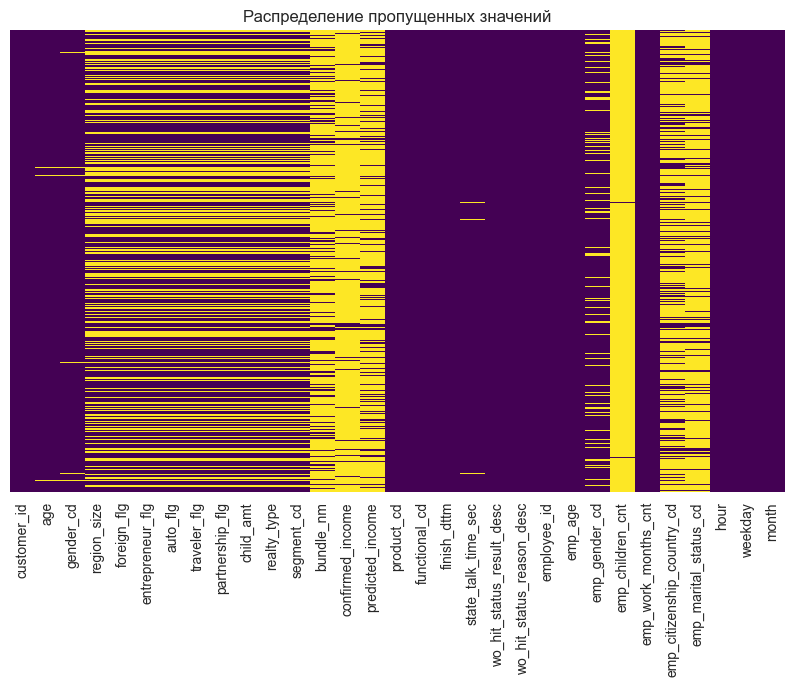

In [90]:
missing = z.isnull().sum()
missing_percent = (missing / len(z)) * 100
missing_table = pd.concat([missing, missing_percent], axis=1, keys=['Total', 'Percent'])
missing_table = missing_table[missing_table['Total'] > 0].sort_values('Total', ascending=False)
print(missing_table)
plt.figure(figsize=(10, 6))
sns.heatmap(z.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Распределение пропущенных значений')
plt.show()

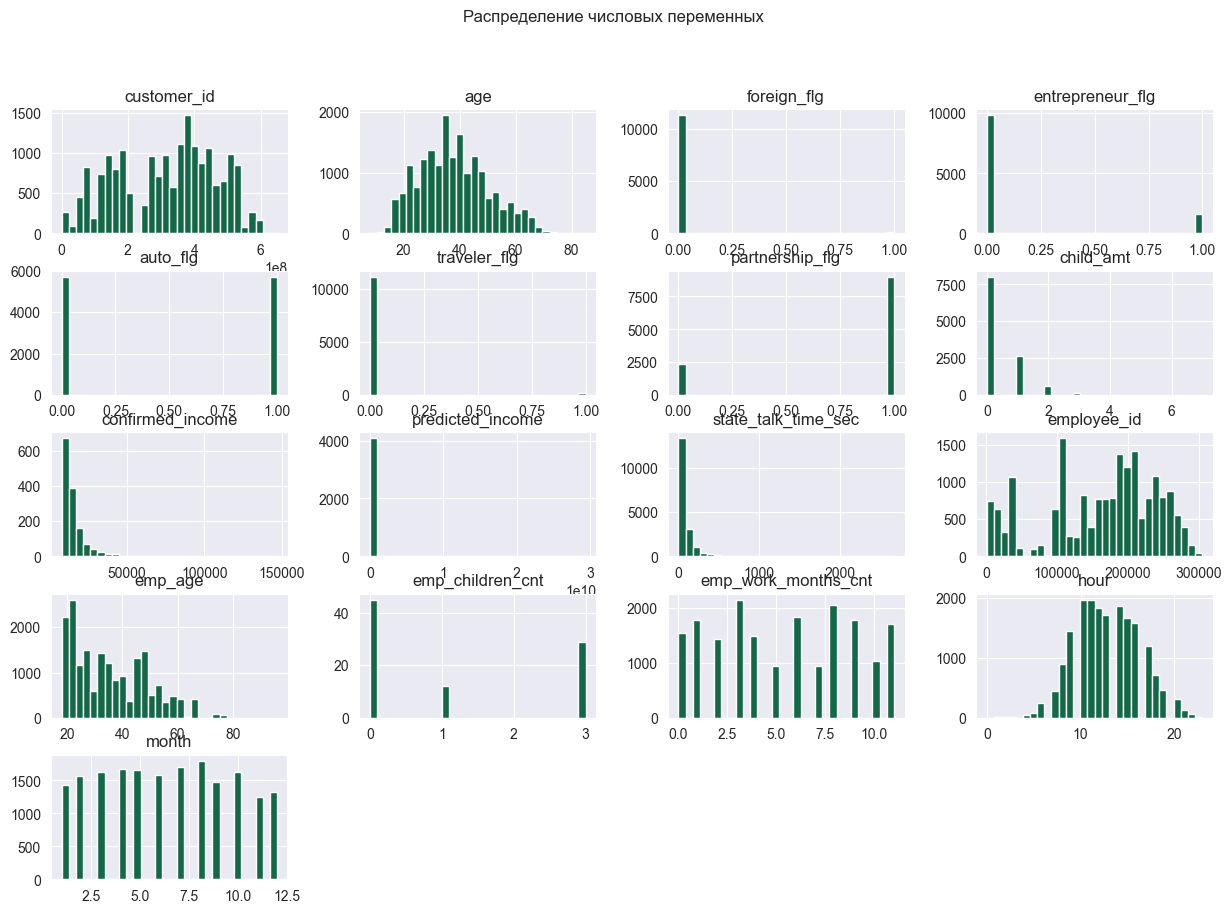

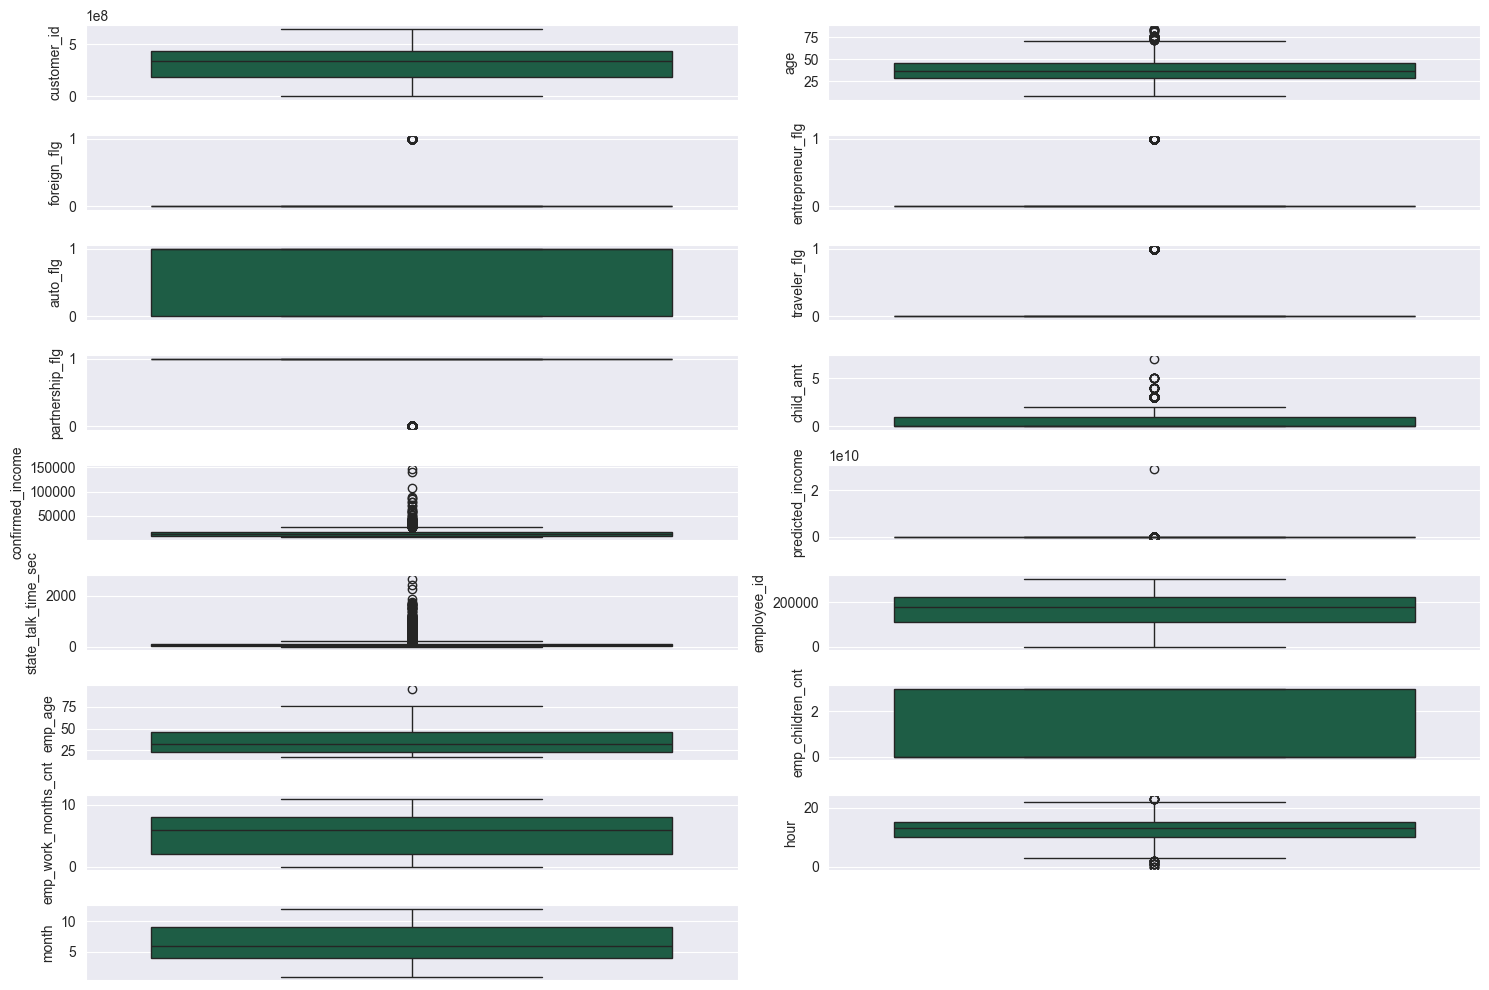

In [91]:
numeric_cols = z.select_dtypes(include=[np.number]).columns

z[numeric_cols].hist(bins=30, figsize=(15, 10), color='#136847')
plt.suptitle('Распределение числовых переменных')
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//2 + 1, 2, i)
    sns.boxplot(y=z[col], color='#136847')
plt.tight_layout()
plt.show()

Колонка: gender_cd
gender_cd
M    9881
F    8552
Name: count, dtype: int64
------
Колонка: region_size
region_size
town     6054
urban    2661
msk      1559
rural    1128
Name: count, dtype: int64
------
Колонка: realty_type
realty_type
Квартира            5731
Нет своего жилья    5445
Жилой дом            130
Комната               96
Name: count, dtype: int64
------
Колонка: segment_cd
segment_cd
t_07 (29)    1014
t_04 (16)     851
t_06 (28)     655
t_05 (19)     600
t_09 (36)     572
Name: count, dtype: int64
------
Колонка: bundle_nm
bundle_nm
Pro        4406
Premium     296
XXX           1
Name: count, dtype: int64
------
Колонка: product_cd
product_cd
Credit Cards    9840
Cash Loan       2681
MVNO            1903
Debit Cards     1886
Investment       870
Name: count, dtype: int64
------
Колонка: functional_cd
functional_cd
Preapprove      9025
Afterfilling    2352
Utilization     1717
Cold            1537
Upsell          1342
Name: count, dtype: int64
------
Колонка: wo_hit_status

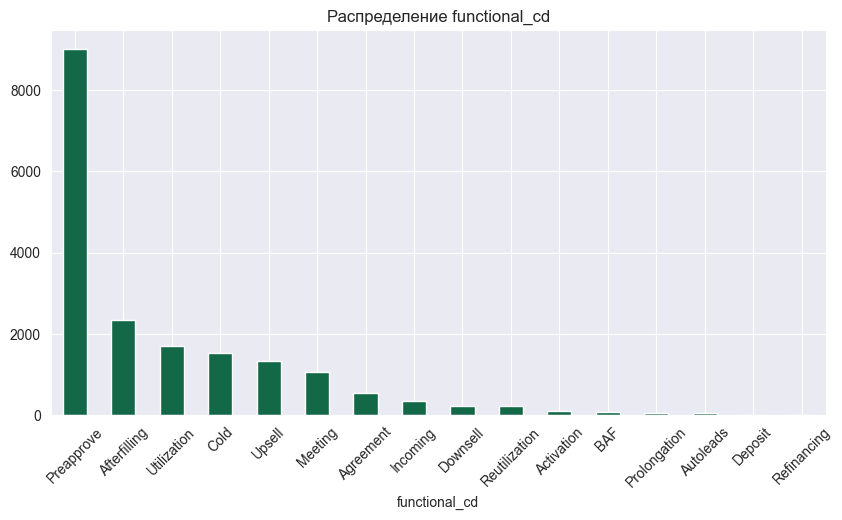

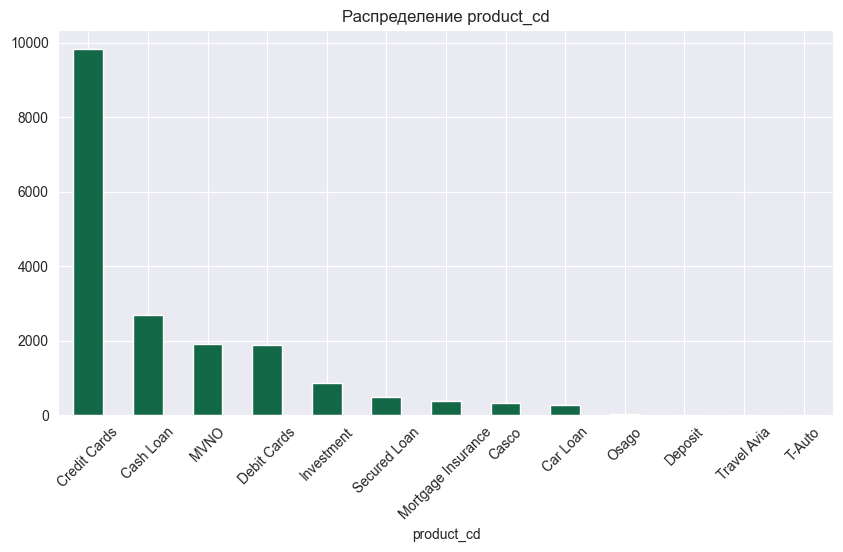

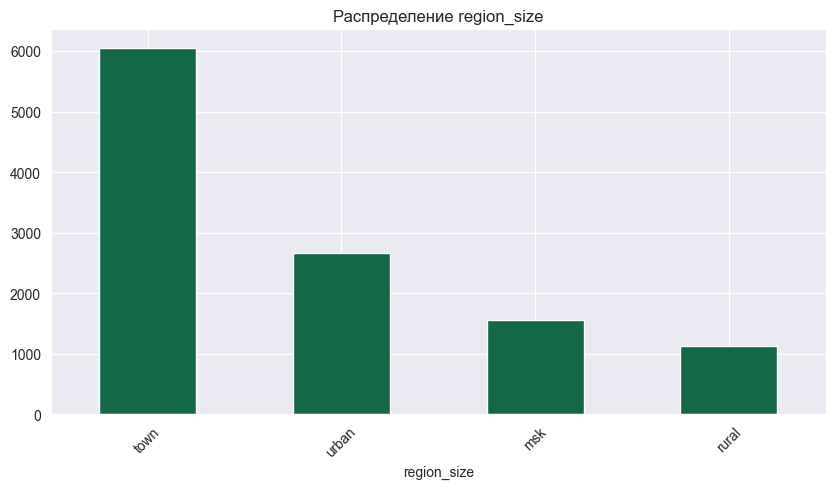

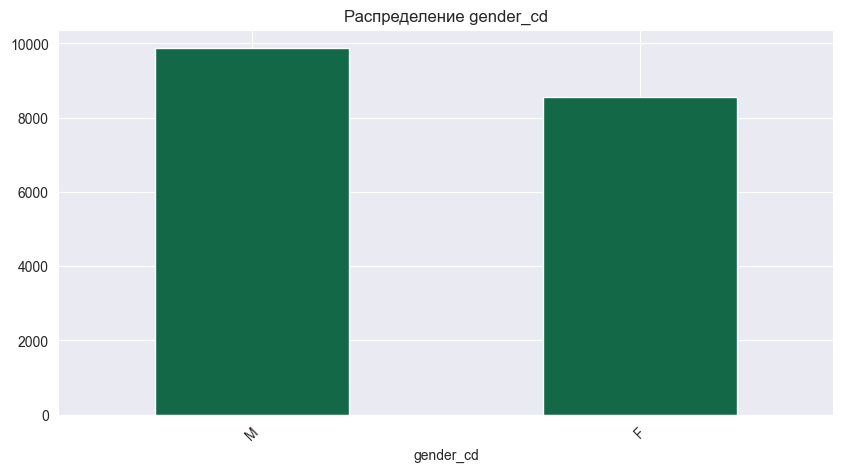

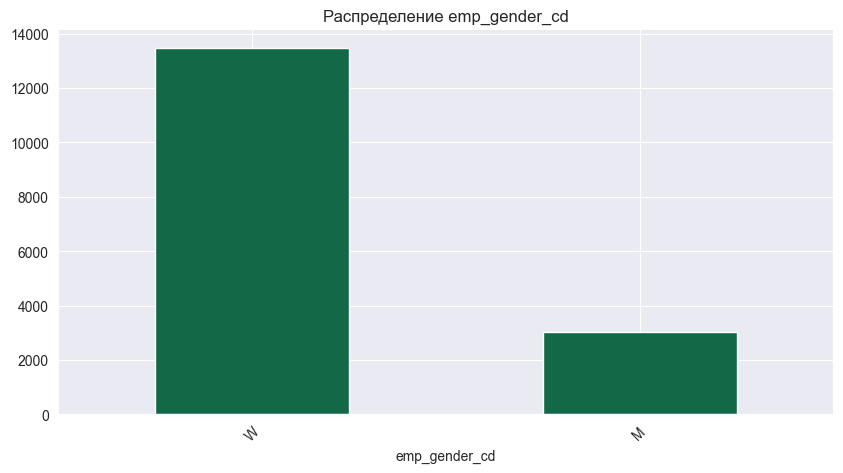

In [92]:
categorical_cols = z.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Колонка: {col}")
    print(z[col].value_counts().head())
    print("------")

key_cat = ['functional_cd', 'product_cd', 'region_size', 'gender_cd', 'emp_gender_cd']
for col in key_cat:
    if col in z.columns:
        plt.figure(figsize=(10, 5))
        z[col].value_counts().plot(kind='bar', color='#136847')
        plt.title(f'Распределение {col}')
        plt.xticks(rotation=45)
        plt.show()

In [93]:
print(f"Количество дубликатов: {z.duplicated().sum()}")

Количество дубликатов: 0


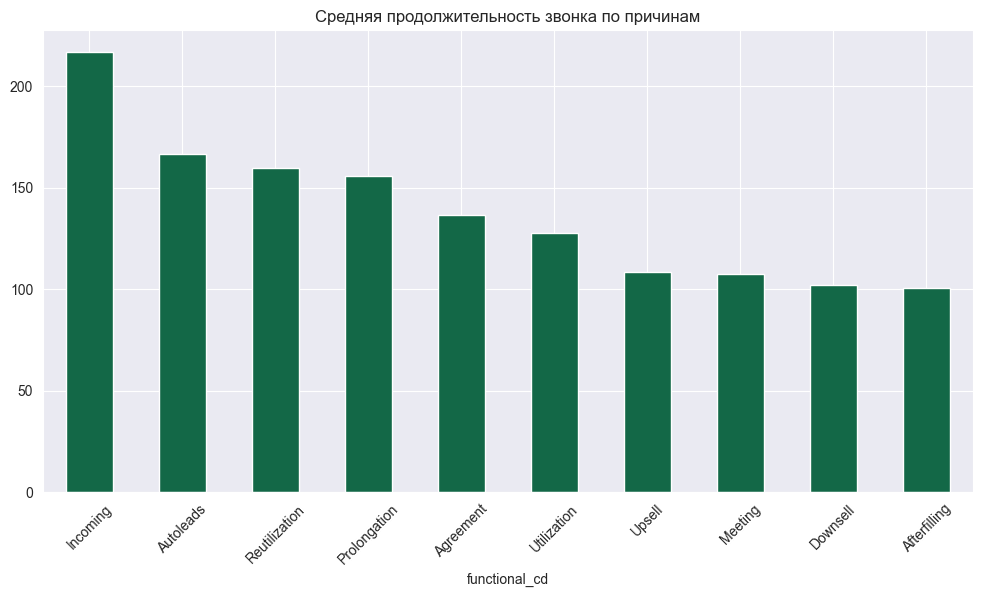

In [94]:
plt.figure(figsize=(12, 6))
z.groupby('functional_cd')['state_talk_time_sec'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='#136847')
plt.title('Средняя продолжительность звонка по причинам')
plt.xticks(rotation=45)
plt.show()

#### Подозрительные значения видим в predicted_income, а также видим, что есть немалое количество долгих звонков, эффективность которых вызывает вопросы

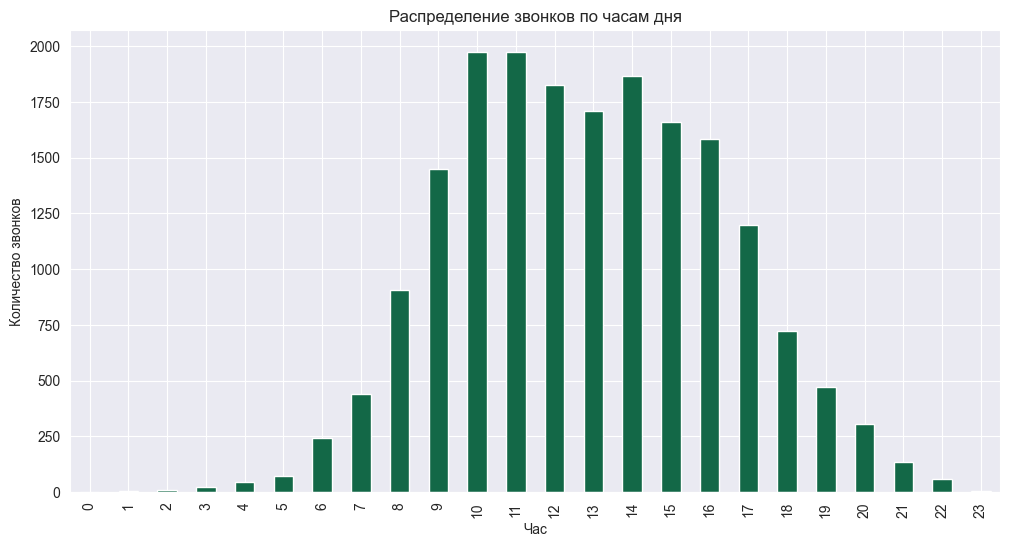

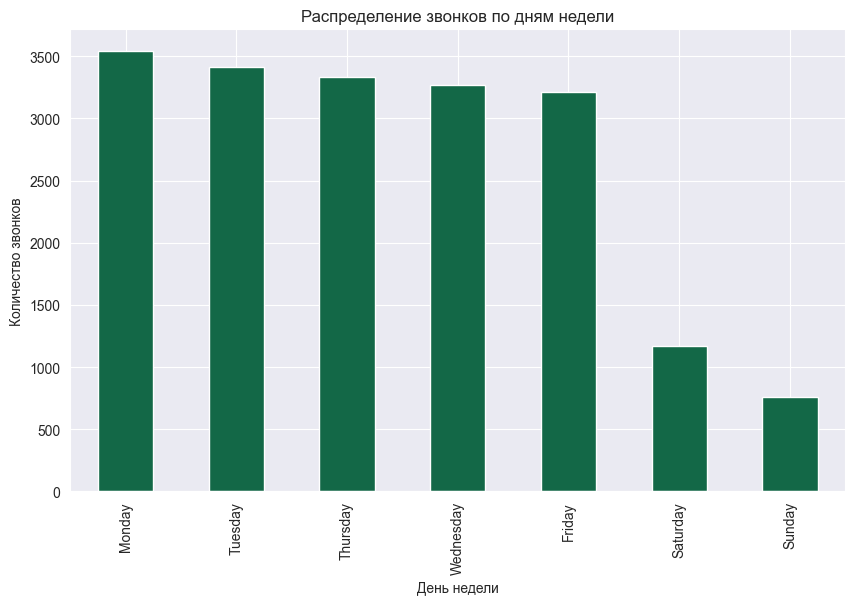

In [95]:
plt.figure(figsize=(12, 6))
z['hour'].value_counts().sort_index().plot(kind='bar', color='#136847')
plt.title('Распределение звонков по часам дня')
plt.xlabel('Час')
plt.ylabel('Количество звонков')
plt.show()

plt.figure(figsize=(10, 6))
z['weekday'].value_counts().plot(kind='bar', color='#136847')
plt.title('Распределение звонков по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество звонков')
plt.show()

#### Рассмотрим входящие звонки. Возможно, время входящих звонков будет отображать более удобное для клиента время звонка. Если предсказывать, какое для конкретной группы клиентов самое оптимальное время - можно снизить количество отказов, звоня им предпочтительно в это время

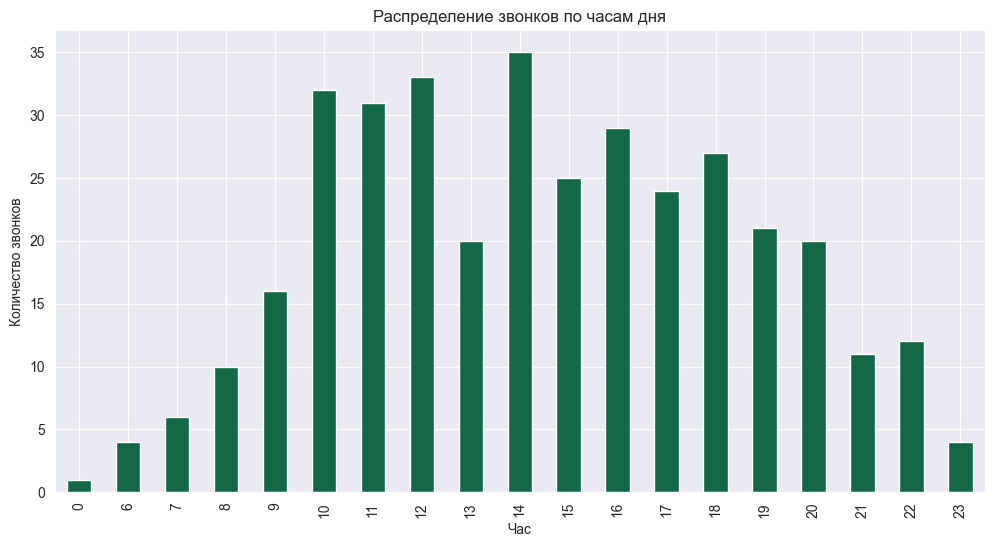

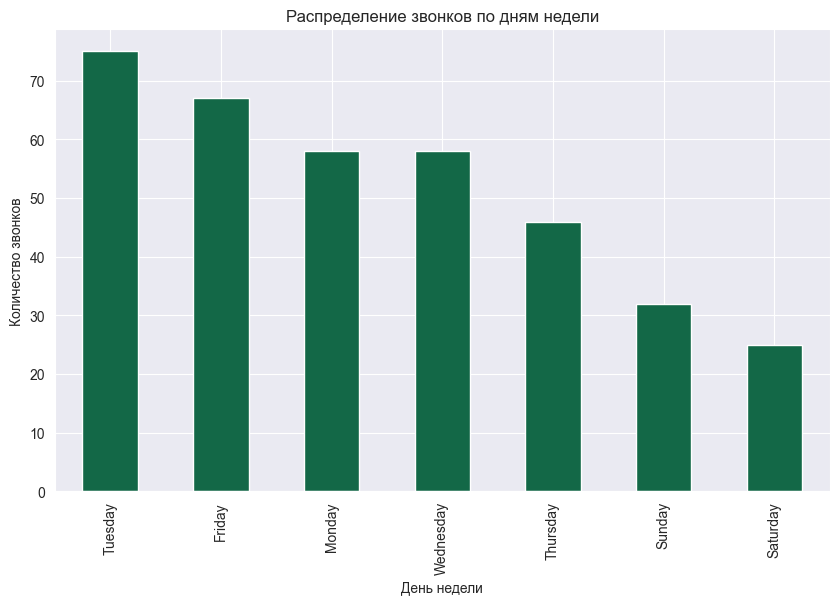

In [96]:
plt.figure(figsize=(12, 6))
z_incoming = z[z.functional_cd == 'Incoming']
z_incoming['hour'].value_counts().sort_index().plot(kind='bar', color='#136847')
plt.title('Распределение звонков по часам дня')
plt.xlabel('Час')
plt.ylabel('Количество звонков')
plt.show()

plt.figure(figsize=(10, 6))
z_incoming['weekday'].value_counts().plot(kind='bar', color='#136847')
plt.title('Распределение звонков по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество звонков')
plt.show() 

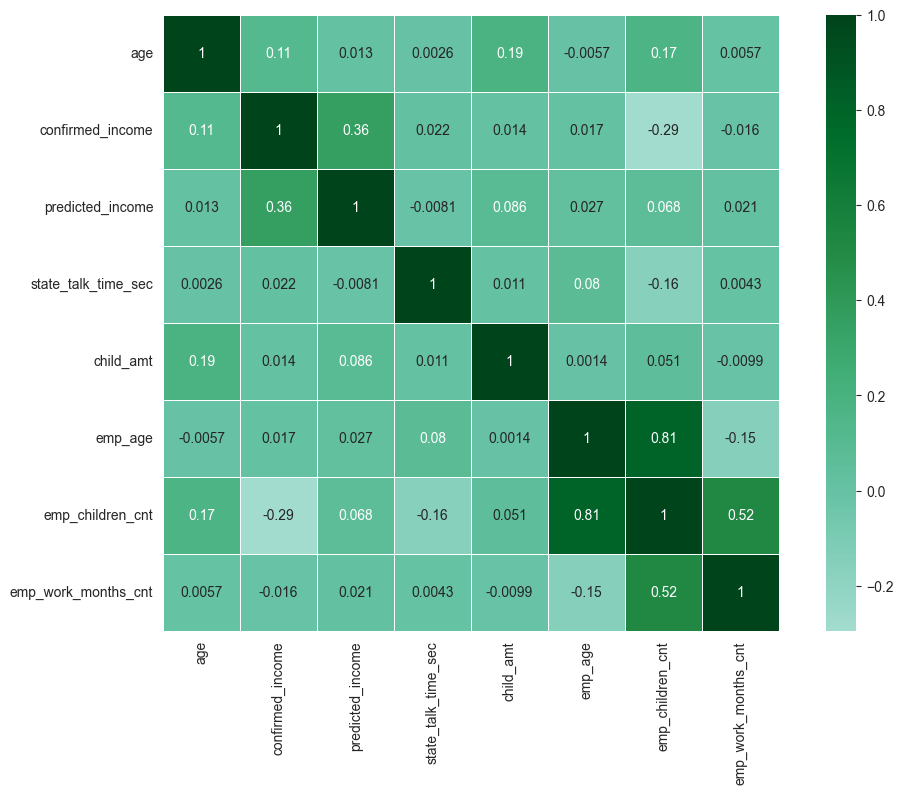

In [97]:
corr_cols = ['age', 'confirmed_income', 'predicted_income', 'state_talk_time_sec', 
             'child_amt', 'emp_age', 'emp_children_cnt', 'emp_work_months_cnt']

plt.figure(figsize=(12, 8))
sns.heatmap(z[corr_cols].corr(), annot=True, cmap='BuGn', center=0, 
            square=True, linewidths=0.5)
plt.show()

# Предобработка данных, очистка от выбросов и заполнение пропусков

85.0 8.0


<Axes: xlabel='predicted_income'>

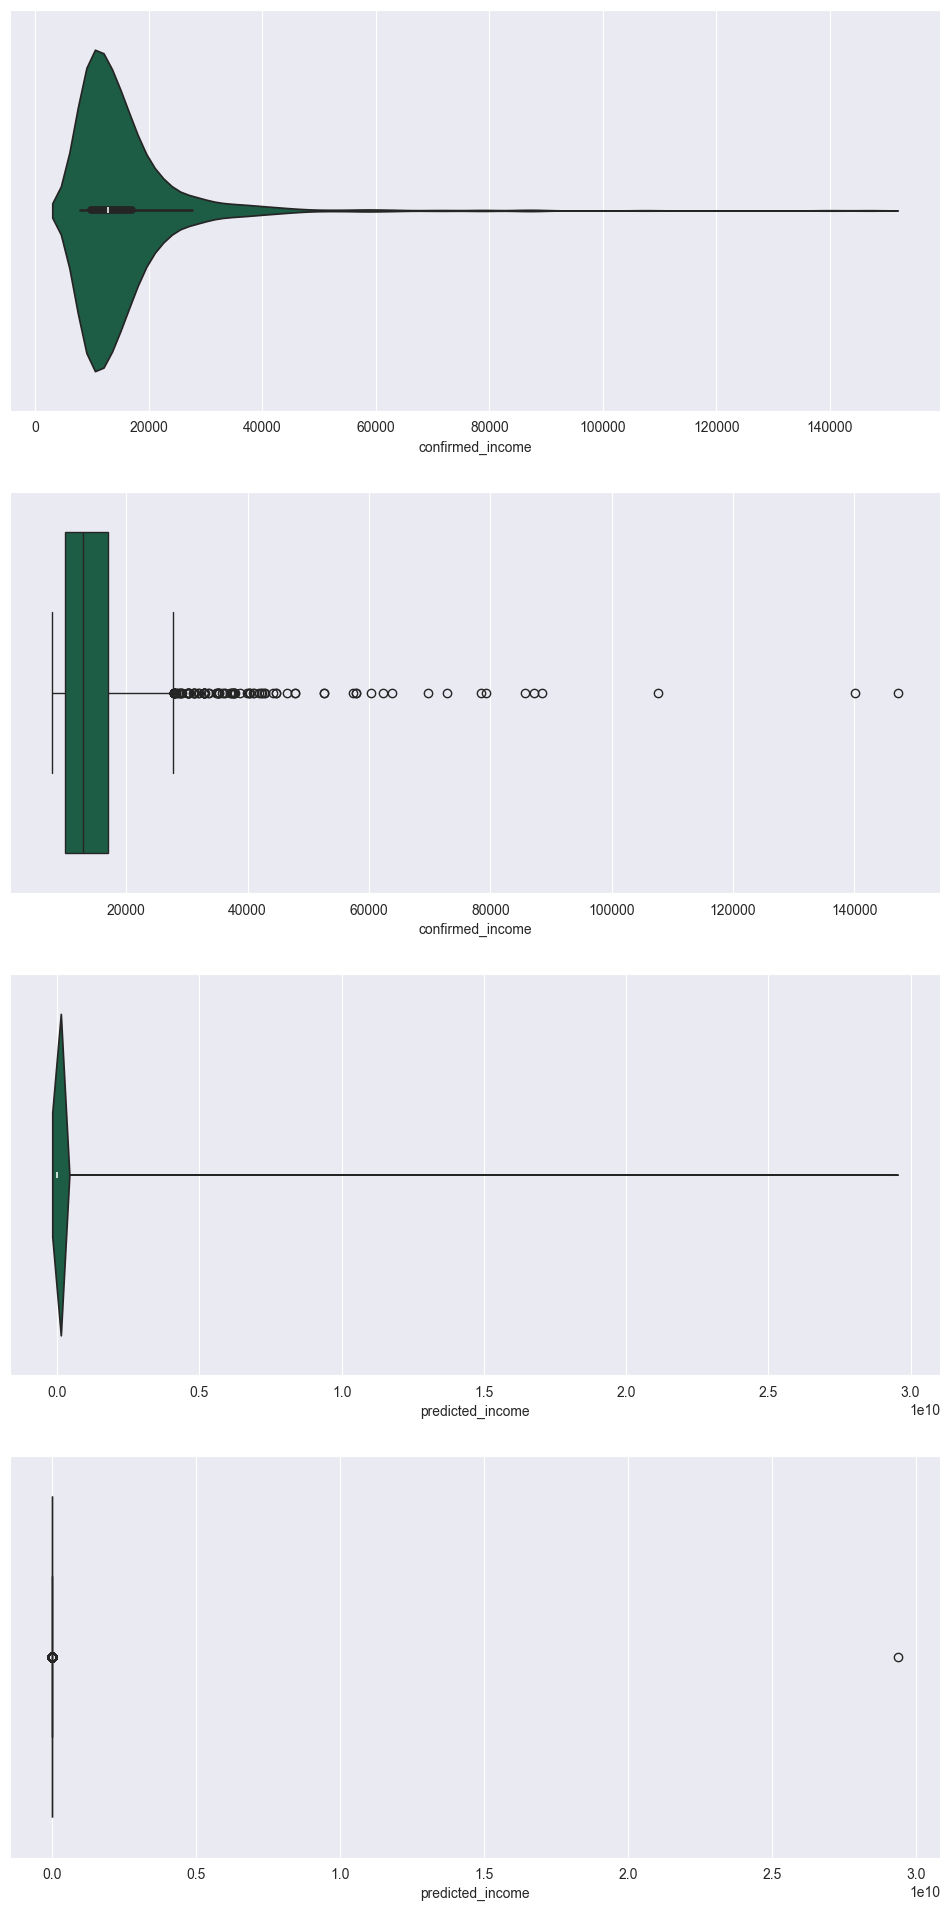

In [98]:
z1 = z.copy()
print(max(z1.age), min(z1.age))
fig, axes = plt.subplots(4, 1, figsize=(12,24))
sns.violinplot(z.confirmed_income, orient='h', ax=axes[0], color='#136847')
sns.boxplot(z.confirmed_income, orient='h', ax=axes[1], color='#136847')
sns.violinplot(z.predicted_income, orient='h', ax=axes[2], color='#136847')
sns.boxplot(z.predicted_income, orient='h', ax=axes[3], color='#136847')

<Axes: xlabel='predicted_income'>

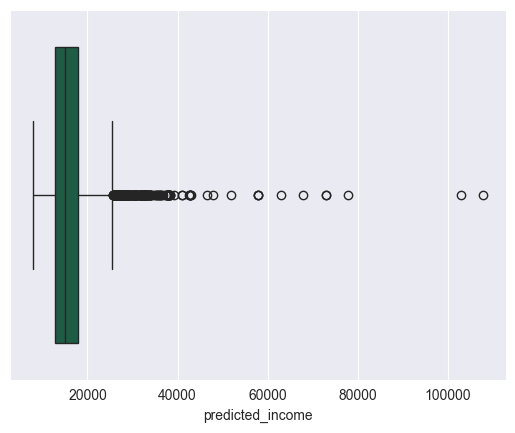

In [99]:
valid_income = z1[(z1['predicted_income'] >= 0) & (z1['predicted_income'] <= 2.5e10)]['predicted_income']
mean_predicted_income = valid_income.mean()
z1.loc[(z1['predicted_income'] < 0) | (z1['predicted_income'] > 2.5e10), 'predicted_income'] = mean_predicted_income

# sns.violinplot(z1.predicted_income, orient='h')
sns.boxplot(z1.predicted_income, orient='h', color='#136847')

#### Учитывая значения подтверждённого дохода, такие значения выглядят более реальными или, по крайней мере, выброс не будет влиять на результаты последующих исследований данных. Для дальнейшего анализа звонков очень важен параметр успеха звонка, рассмотрим колонку wo_hit_status_resuklr_desc:

In [100]:
z1.loc[:, 'wo_hit_status_result_bool'] = z1.wo_hit_status_result_desc.apply(lambda x: 1 if x == 'Дозвон, Успешно' else 0) #Заменим Отказ на 0, успех на 1
z1.wo_hit_status_result_bool.unique()

array([0, 1])

In [101]:
z.wo_hit_status_reason_desc.unique()

array(['Перезвонит самостоятельно позднее', 'Другое', 'Назначена встреча',
       'Обещал утилизироваться самостоятельно', 'Переведен в банк',
       'Отказ прослушать предложение', 'Страхуется в своей СК',
       'Другое (нестандартная ситуация)', 'Кредитная карта не нужна',
       'Отказ от диалога', 'Не звонить', 'Отказ от использования КК',
       'Кредит уже не нужен', 'Негатив/Не звонить', 'Действующий клиент',
       'Не нужен продукт',
       'Не интересно КАСКО;Никогда не страхует КАСКО на свои авто',
       'Не хочет ДК', 'Не требуется сейчас', 'Устраивает свой оператор',
       'Заявку не оставлял', 'Третье лицо',
       'Успешно информирован, не совершил сделку в звонке',
       'Готов использовать карту', 'Полис оплачен',
       'Отказ по всем продуктам', 'Не хочет разбираться',
       'Не звонить / резкий негатив', 'Полная заявка', 'Отказ после БКИ',
       'Дебетовая карта не нужна', 'Нет собственного жилья',
       'Не соответствует требованиям', 'Нет потребности в кред

## Анализ причин отказов

,total_calls,successful_calls,refusal_rate
functional_cd,,,
Meeting,1064,465,0.562970
Prolongation,49,19,0.612245
Utilization,1717,586,0.658707
Incoming,361,123,0.659280
Reutilization,228,70,0.692982
Agreement,547,118,0.784278
BAF,85,18,0.788235
Afterfilling,2352,358,0.847789
Downsell,229,28,0.877729


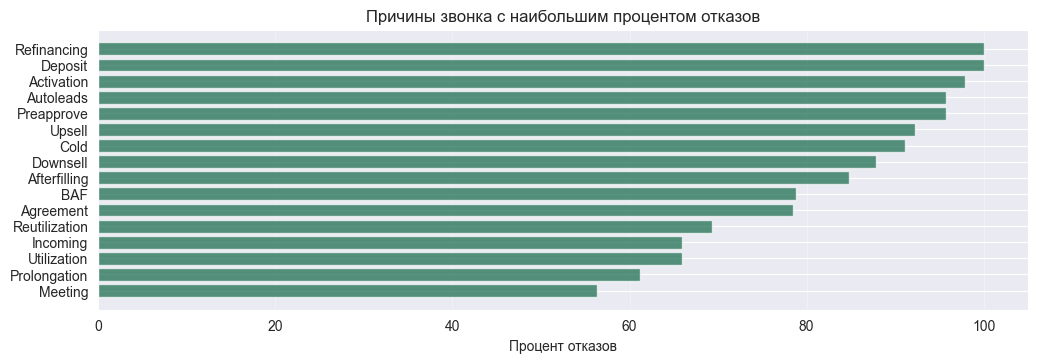

In [102]:
refusal_by_reason = z1.groupby('functional_cd')['wo_hit_status_result_bool'].agg([
    ('total_calls', 'count'),
    ('successful_calls', 'sum'),
    ('refusal_rate', lambda x: 1 - x.mean())
]).sort_values('refusal_rate', ascending=True)
plt.figure(figsize=(12, 8))
top_refusal_reasons = refusal_by_reason
plt.subplot(2, 1, 1)
plt.barh(top_refusal_reasons.index, top_refusal_reasons['refusal_rate'] * 100, color='#136847', alpha=0.7)
plt.title('Причины звонка с наибольшим процентом отказов')
plt.xlabel('Процент отказов')
plt.grid(axis='x', alpha=0.3)
refusal_by_reason

In [103]:
refusal_by_product = z1.groupby('product_cd')['wo_hit_status_result_bool'].agg([
    ('total_calls', 'count'),
    ('successful_calls', 'sum'),
    ('refusal_rate', lambda x: 1 - x.mean())
]).sort_values('refusal_rate', ascending=False)
refusal_by_product

,total_calls,successful_calls,refusal_rate
product_cd,,,
Deposit,11,0,1.000000
T-Auto,2,0,1.000000
Mortgage Insurance,373,29,0.922252
Secured Loan,484,38,0.921488
Credit Cards,9840,787,0.920020
Cash Loan,2681,290,0.891831
Investment,870,107,0.877011
Casco,320,55,0.828125
MVNO,1903,346,0.818182


По полу клиента:
           total_calls  refusal_rate
gender_cd                           
F                 8552      0.884939
M                 9881      0.862058

По возрастным группам:
           total_calls  refusal_rate
age_group                           
18-25             3245      0.855778
26-35             5011      0.879266
36-45             5436      0.867182
46-55             2911      0.868430
56-65             1556      0.904242
65+                350      0.860000


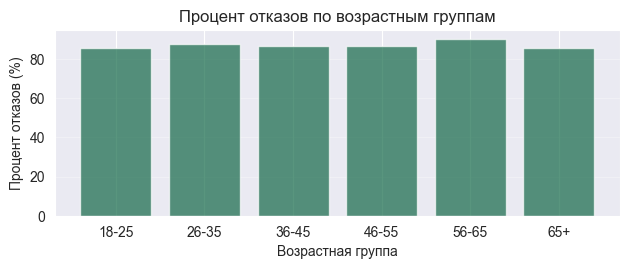

In [110]:
gender_refusal = z1.groupby('gender_cd')['wo_hit_status_result_bool'].agg([
    ('total_calls', 'count'),
    ('refusal_rate', lambda x: 1 - x.mean())
])
print("По полу клиента:")
print(gender_refusal)

plt.subplot(2, 1, 2)
z1['age_group'] = pd.cut(z1['age'], bins=[0, 25, 35, 45, 55, 65, 100], 
                        labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
age_refusal = z1.groupby('age_group')['wo_hit_status_result_bool'].agg([
    ('total_calls', 'count'),
    ('refusal_rate', lambda x: 1 - x.mean())
]).dropna()
plt.bar(age_refusal.index, age_refusal['refusal_rate'] * 100, color='#136847', alpha=0.7)
plt.title('Процент отказов по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент отказов (%)')
plt.grid(axis='y', alpha=0.3)
print("\nПо возрастным группам:")
print(age_refusal)

plt.tight_layout()
plt.show()

In [105]:
region_refusal = z1.groupby('region_size')['wo_hit_status_result_bool'].agg([
    ('total_calls', 'count'),
    ('refusal_rate', lambda x: 1 - x.mean())
]).sort_values('refusal_rate', ascending=False)
print(region_refusal)

             total_calls  refusal_rate
region_size                           
msk                 1559      0.889673
urban               2661      0.880120
town                6054      0.851338
rural               1128      0.827128


По группам дохода:
               total_calls  refusal_rate
income_group                            
Очень низкий           282      0.865248
Низкий                 283      0.901060
Средний                280      0.914286
Высокий                280      0.882143
Очень высокий          282      0.925532
По часам дня:
           total_calls  refusal_rate
call_hour                           
0                    3      0.666667
1                    7      0.857143
2                    8      1.000000
3                   22      0.772727
4                   44      0.863636
5                   74      0.783784
6                  244      0.864754
7                  441      0.877551
8                  905      0.881768
9                 1449      0.890269
10                1972      0.871197
11                1973      0.872783
12                1826      0.876780
13                1711      0.884863
14                1867      0.882700
15                1659      0.880651
16            

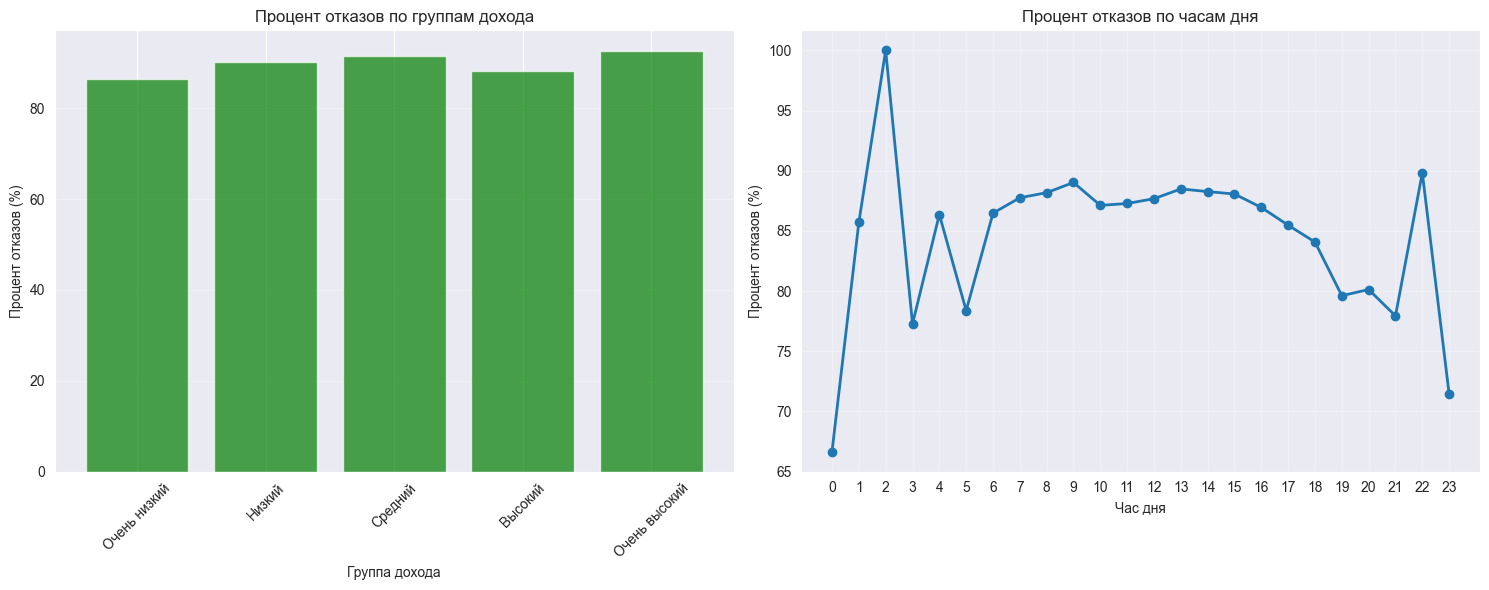

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


z1['income_group'] = pd.qcut(z1['confirmed_income'], q=5, labels=['Очень низкий', 'Низкий', 'Средний', 'Высокий', 'Очень высокий'])
income_refusal = z1.groupby('income_group')['wo_hit_status_result_bool'].agg([
    ('total_calls', 'count'),
    ('refusal_rate', lambda x: 1 - x.mean())
]).dropna()

axes[0].bar(income_refusal.index, income_refusal['refusal_rate'] * 100, color='green', alpha=0.7)
axes[0].set_title('Процент отказов по группам дохода')
axes[0].set_xlabel('Группа дохода')
axes[0].set_ylabel('Процент отказов (%)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

print("По группам дохода:")
print(income_refusal)
    
z1['call_hour'] = pd.to_datetime(z1['finish_dttm']).dt.hour
hour_refusal = z1.groupby('call_hour')['wo_hit_status_result_bool'].agg([
    ('total_calls', 'count'),
    ('refusal_rate', lambda x: 1 - x.mean())
])

axes[1].plot(hour_refusal.index, hour_refusal['refusal_rate'] * 100, marker='o', linewidth=2, markersize=6)
axes[1].set_title('Процент отказов по часам дня')
axes[1].set_xlabel('Час дня')
axes[1].set_ylabel('Процент отказов (%)')
axes[1].set_xticks(range(0, 24))
axes[1].grid(True, alpha=0.3)

print("По часам дня:")
print(hour_refusal)

plt.tight_layout()
plt.show()

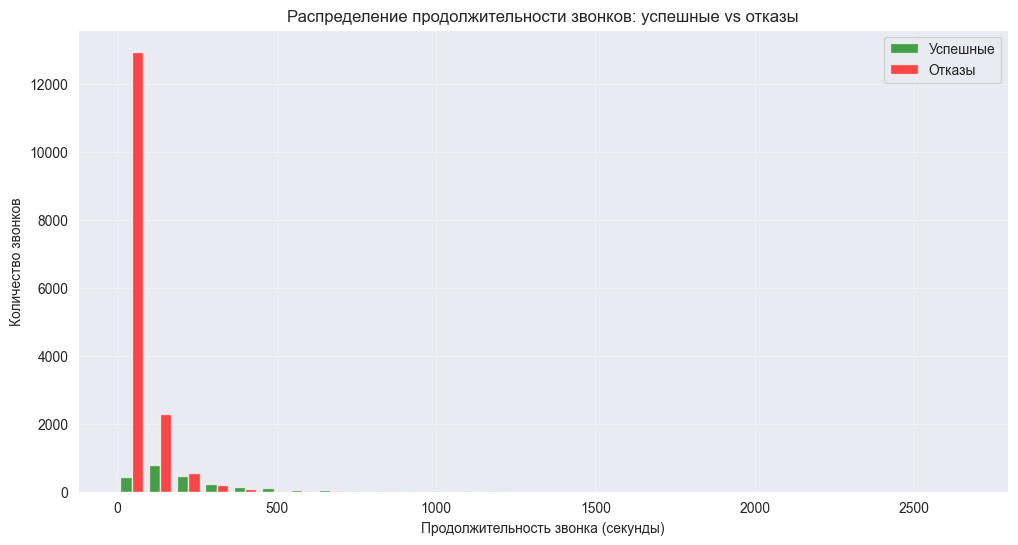

Средняя продолжительность успешных звонков: 245.8 сек
Средняя продолжительность отказов: 62.9 сек


In [107]:
plt.figure(figsize=(12, 6))

successful_calls = z1[z1['wo_hit_status_result_bool'] == 1]['state_talk_time_sec']
refused_calls = z1[z1['wo_hit_status_result_bool'] == 0]['state_talk_time_sec']

plt.hist([successful_calls, refused_calls], 
         bins=30, alpha=0.7, label=['Успешные', 'Отказы'], color=['green', 'red'])
plt.title('Распределение продолжительности звонков: успешные vs отказы')
plt.xlabel('Продолжительность звонка (секунды)')
plt.ylabel('Количество звонков')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Средняя продолжительность успешных звонков: {successful_calls.mean():.1f} сек")
print(f"Средняя продолжительность отказов: {refused_calls.mean():.1f} сек")

In [108]:
numeric_columns = ['age', 'confirmed_income', 'predicted_income', 'state_talk_time_sec', 
                  'child_amt', 'emp_age', 'emp_children_cnt', 'emp_work_months_cnt']

correlations = z1[numeric_columns + ['wo_hit_status_result_bool']].corr()['wo_hit_status_result_bool'].drop('wo_hit_status_result_bool')
correlations_sorted = correlations.abs().sort_values(ascending=False)
print("Корреляции числовых переменных с успешностью звонка:")
for col in correlations_sorted.index:
    print(f"  {col}: {correlations[col]:.3f}")

Корреляции числовых переменных с успешностью звонка:
  state_talk_time_sec: 0.481
  emp_children_cnt: -0.324
  emp_age: 0.058
  age: -0.023
  predicted_income: -0.020
  child_amt: 0.008
  emp_work_months_cnt: 0.003
  confirmed_income: -0.003


In [109]:
combo_refusal = z1.groupby(['functional_cd', 'product_cd'])['wo_hit_status_result_bool'].agg([
    ('total_calls', 'count'),
    ('refusal_rate', lambda x: 1 - x.mean())
]).sort_values('refusal_rate', ascending=False)

significant_combos = combo_refusal[combo_refusal['total_calls'] > 10].head(10)
print("Комбинаций причина-продукт с самым высоким процентом отказов:")
print(significant_combos)

Комбинаций причина-продукт с самым высоким процентом отказов:
                                  total_calls  refusal_rate
functional_cd product_cd                                   
Deposit       Deposit                      11      1.000000
Preapprove    Cash Loan                   945      0.990476
Activation    Cash Loan                    95      0.978947
Cold          Debit Cards                 506      0.968379
Upsell        Secured Loan                400      0.962500
Cold          Mortgage Insurance          287      0.958188
Autoleads     Investment                   47      0.957447
Preapprove    Credit Cards               7973      0.953468
Afterfilling  Credit Cards                611      0.947627
Preapprove    Car Loan                    107      0.934579
